In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 

In [2]:
batch_size = 32
dataset = tf.keras.preprocessing.image_dataset_from_directory(
                "/Users/abdulbari/Downloads/PlantVillage",
                batch_size=batch_size,
                image_size=(256,256),
                seed=42
            )


Found 16011 files belonging to 10 classes.


In [3]:
class_names = dataset.class_names
length = len(dataset)
print(class_names)
print(length)

['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
501


## Viewing the data

2024-09-29 16:07:12.565940: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-09-29 16:07:14.130254: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-09-29 16:07:17.308472: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-09-29 16:07:23.746707: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


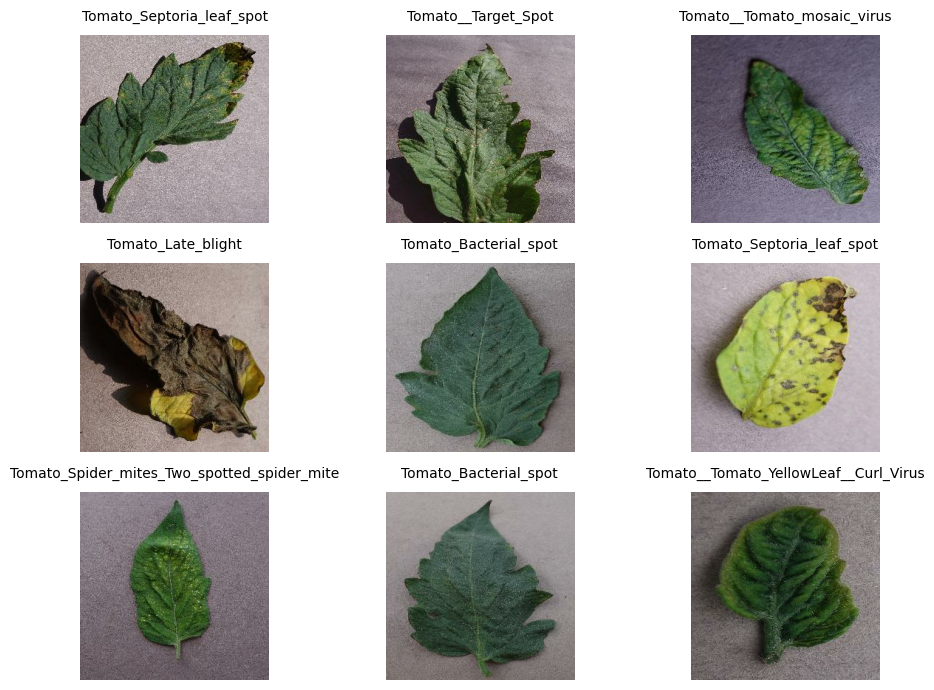

In [4]:
import random

rand_batch_index = random.randint(0, length-1)
selected_batch = dataset.skip(rand_batch_index).take(1)
rand_image_index = random.randint(0, batch_size-1)

def display_random_images(selected_batch, class_names):

    plt.figure(figsize=(10,7))
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        
        for image_batch, label_batch in selected_batch:   
            ax.imshow(image_batch[rand_image_index] / 255)
            ax.set_title(class_names[label_batch[rand_image_index]], fontsize=10, pad=10)
            ax.axis(False)

    plt.tight_layout()
    plt.show()

display_random_images(selected_batch, class_names)

## Train, test and validation splits

In [5]:
def get_splitted_data(dataset, train_split, validation_split, test_split):
    dataset = dataset.shuffle(length)

    # length of each dataset
    train_len = int(train_split * length)
    validation_len = int(validation_split * length)
    test_len = int(test_split * length)

    # separating the data
    train_data = dataset.take(train_len)
    dataset = dataset.skip(train_len)

    validation_data = dataset.take(validation_len)
    dataset = dataset.skip(validation_len)

    test_data = dataset.take(test_len)

    return train_data, validation_data, test_data
    

In [6]:
train_data, validation_data, test_data = get_splitted_data(dataset, train_split=0.8, validation_split=0.1, test_split=0.1)
len(train_data), len(validation_data), len(test_data)

(400, 50, 50)

### Optimising data pipeline

In [7]:
train_data = train_data.cache().prefetch(tf.data.AUTOTUNE)
validation_data = validation_data.cache().prefetch(tf.data.AUTOTUNE)
test_data = test_data.cache().prefetch(tf.data.AUTOTUNE)

## Model

In [18]:
IMAGE_SIZE = 256

Epoch 1/15


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 255s 636ms/step - accuracy: 0.3514 - loss: 4.2363 - val_accuracy: 0.6669 - val_loss: 1.0511
Epoch 2/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 261s 651ms/step - accuracy: 0.7039 - loss: 0.9151 - val_accuracy: 0.7575 - val_loss: 0.7607
Epoch 3/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 255s 638ms/step - accuracy: 0.7655 - loss: 0.7023 - val_accuracy: 0.8037 - val_loss: 0.5754
Epoch 4/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 256s 639ms/step - accuracy: 0.8110 - loss: 0.5627 - val_accuracy: 0.8319 - val_loss: 0.5060
Epoch 5/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 249s 623ms/step - accuracy: 0.8370 - loss: 0.4893 - val_accuracy: 0.8375 - val_loss: 0.4880
Epoch 6/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 250s 624ms/step - accuracy: 0.8555 - loss: 0.4176 - val_accuracy: 0.8544 - val_loss: 0.4390
Epoch 7/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 250s 624ms/step - accuracy: 0.8615 - loss: 0.3978 - val_accuracy: 0.8781 - val_loss: 0.3437
Epoch 8/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 219s 547ms/step - accuracy: 0.8732 - loss: 0.38

<Axes: >

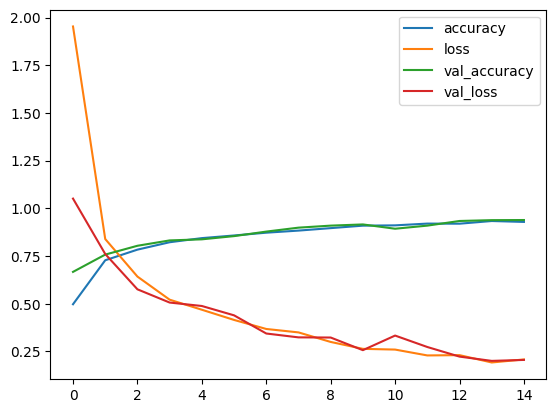

In [13]:

model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=[IMAGE_SIZE, IMAGE_SIZE, 3]),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model3_history = model3.fit(train_data, batch_size=batch_size, epochs=15, validation_data=validation_data)

pd.DataFrame(model3_history.history).plot()

In [14]:
model3.evaluate(test_data)

50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - accuracy: 0.9335 - loss: 0.1909


[0.17279399931430817, 0.9474350810050964]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


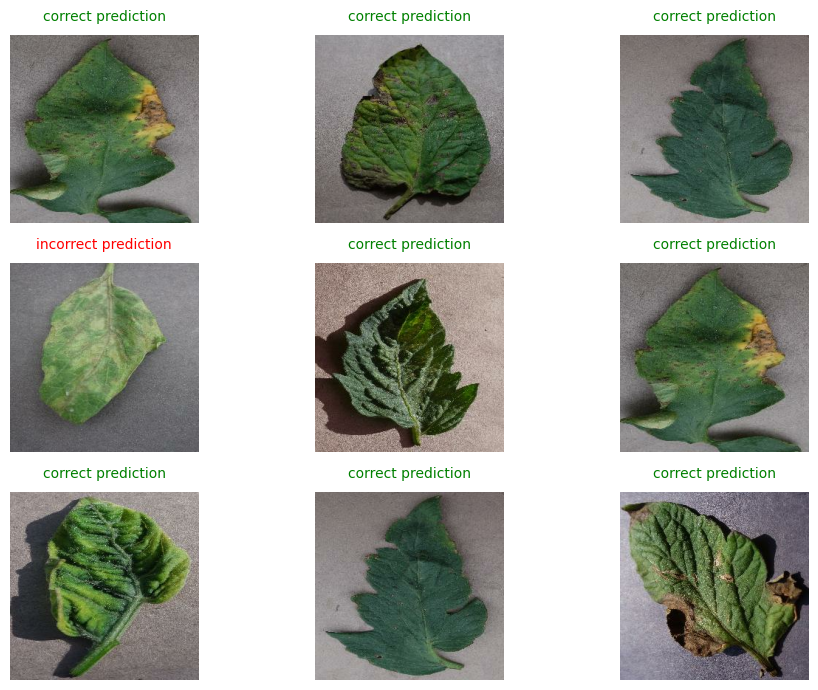

In [20]:
def test_predictions(batch):
    plt.figure(figsize=(10,7))
    
    for image_batch, label_batch in batch:
        predictions = model3.predict(image_batch, batch_size=batch_size)
        all_predictions = tf.argmax(predictions, axis=1)
    
        for i in range(9):
            ax = plt.subplot(3, 3, i+1)
            rand_image_index = random.randint(0, batch_size-1)   
            ax.imshow(image_batch[rand_image_index] / 255)
            our_prediction = class_names[all_predictions[rand_image_index]]
            label = class_names[label_batch[rand_image_index]]
            title_color, title = ("green", "correct prediction") if our_prediction == label else ("red", "incorrect prediction")
            ax.set_title(title, color=title_color, fontsize=10, pad=10)
            ax.axis(False)

    plt.tight_layout()
    plt.show()
       
test_predictions(batch=selected_batch)
        